# The objectives of this jupyter notebook (modeling.ipynb):

1. By using the same training strategy (Leave-One-Out Cross Validation), the same method of slicing and dividing the dataset (with the same random seeds to ensure that each model gets exactly the same data), six different machine learning models (Logistic Regression, Random Forest Classifier, SVM, Gradient Boosting Classifier, XGBoost and Neural Network) were trained, and for each model the performance metrics associated with the volume (accuracy, precision, recall and F1-score) were computed. An overall bar chart is ploted to visually compare the performance of each model, and this bar chart is used to determine which model to use in the last application phase.



2. re-train the best model as a individual file, and to be used for later application phase.



**Note1: When you try to re-run the code below, be sure to redefine the path to the data file to suit your current environment.**

**Note2: It is recommended to use Google colab to run the following code, making sure you have permission to use it from Google Earth Engine.**

### Import Some necessary packages and fucs

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from google.colab import drive
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from joblib import load
drive.mount('/content/gdrive')
import sys
tool_folder_dir = "/content/gdrive/MyDrive/irp_project_111/tools"
sys.path.append(tool_folder_dir)
from common_fucs import discard_duplicates
from modeling import deal_with_nan, get_datasets_for_Modeling
from modeling import train_and_evaluate_model, preprocess_datasets, plot_model_performance
from modeling import load_data, check_missing_values
modeling_data_path = '/content/gdrive/MyDrive/irp_project_111/data/Modeling_Data/modeling_data.csv'

Mounted at /content/gdrive


### For Objective 1: Training the models and evaluate them as a final bar chart.

In [2]:
data = load_data(modeling_data_path)
check_missing_values(data)

# Apparently, too much is missing for 'STI' then, drop it with all unnecessary cols:
unnecessary_cols_list = ['Lon',
            'Lat',
            'Duration',
            'Max_Duration',
            'Event_Start_Date',
            'Event_End_Date',
            'Mean_Rainfall',
            'Median_Rainfall',
            'STI']
data.drop(columns = unnecessary_cols_list, inplace=True)
region_name_ls = ['ROI1', 'ROI2']
data = deal_with_nan(data, region_name_ls, print_info=False)
datasets = get_datasets_for_Modeling(data, drop_flood_id=True, drop_duplicates=True, print_discard_duplicates_info=False)

# Try different models:
project_results_path = "/content/gdrive/MyDrive/irp_project_111/results"

# Try Logistic Regression:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
metrics_lr = train_and_evaluate_model(datasets, lr_model, "Logistic Regression", plot_metrics=False, save_metrics_path=project_results_path+"/modeling/lr_performance_metrices.csv")

# Try Random Forest Classifier:
rf_model = RandomForestClassifier(random_state=42)
metrics_rf = train_and_evaluate_model(datasets, rf_model, "Random Forest Classifier", plot_metrics=False, save_metrics_path=project_results_path+"/modeling/rf_performance_metrices.csv")

# Try SVM:
svm_model = SVC(random_state=42)
metrics_svm = train_and_evaluate_model(datasets, svm_model, "SVM", plot_metrics=False, save_metrics_path=project_results_path+"/modeling/svm_performance_metrices.csv")

# Try Gradient Boosting Classifier:
gbc_model = GradientBoostingClassifier(random_state=42)
metrics_gbc = train_and_evaluate_model(datasets, gbc_model, "Gradient Boosting Classifier", plot_metrics=False, save_metrics_path=project_results_path+"/modeling/gbc_performance_metrices.csv")


# Try XGBoost:
xgb_model = XGBClassifier(random_state=42)
metrics_xgb = train_and_evaluate_model(datasets, xgb_model, "XGB Classifier", plot_metrics=False, save_metrics_path=project_results_path+"/modeling/xgbc_performance_metrices.csv")


# Try Neural Network
metrics_dl = train_and_evaluate_model(datasets, None, "Neural Net", plot_metrics=False, deep_learning_epoch=60, save_metrics_path=project_results_path+"/modeling/nn_performance_metrices.csv")

Check how many missing values are in the following columns: 
slope             13
slope_aspect    1465
SPI                1
STI             4061
TWI                1
dtype: int64




Splitting dataset:   0%|          | 0/9 [00:00<?, ?it/s]

Processing subsets:   0%|          | 0/9 [00:00<?, ?it/s]

your Logistic Regression performance metric file(.csv) has been saved to /content/gdrive/MyDrive/irp_project_111/results/modeling/lr_performance_metrices.csv 
your Random Forest Classifier performance metric file(.csv) has been saved to /content/gdrive/MyDrive/irp_project_111/results/modeling/rf_performance_metrices.csv 
your SVM performance metric file(.csv) has been saved to /content/gdrive/MyDrive/irp_project_111/results/modeling/svm_performance_metrices.csv 
your Gradient Boosting Classifier performance metric file(.csv) has been saved to /content/gdrive/MyDrive/irp_project_111/results/modeling/gbc_performance_metrices.csv 
your XGB Classifier performance metric file(.csv) has been saved to /content/gdrive/MyDrive/irp_project_111/results/modeling/xgbc_performance_metrices.csv 
23/23 [==============================] - 0s 1ms/step
your Neural Net performance metric file(.csv) has been saved to /content/gdrive/MyDrive/irp_project_111/results/modeling/nn_performance_metrices.csv 


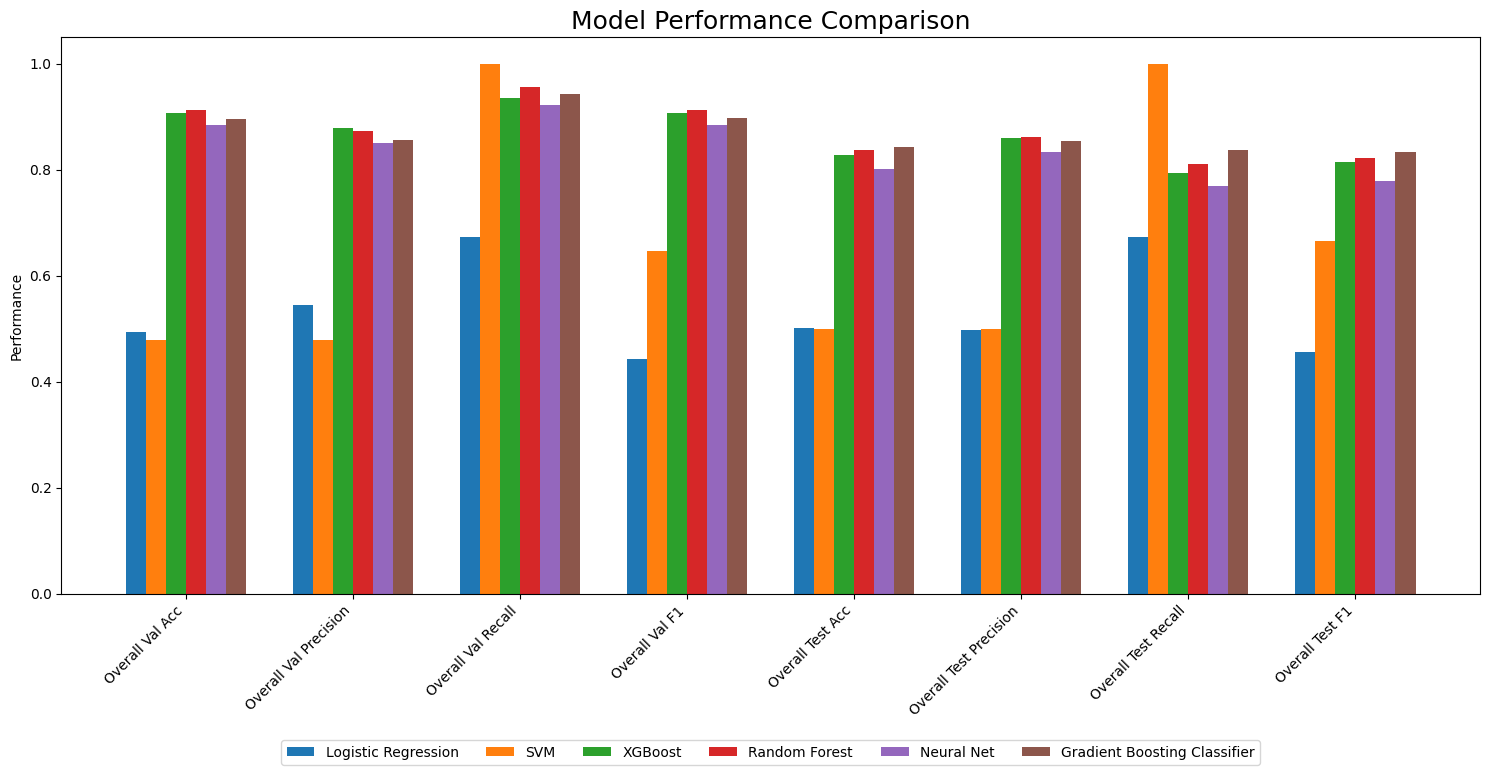

In [3]:
# Visualise the Model Performance Comparison
models_dict = {
    "Logistic Regression": metrics_lr,
    "SVM": metrics_svm,
    "XGBoost":metrics_xgb,
    "Random Forest": metrics_rf,
    "Neural Net": metrics_dl,
    "Gradient Boosting Classifier":metrics_gbc
}
plot_model_performance(models_dict, save_path="/content/gdrive/MyDrive/irp_project_111/results/modeling/Model_Performance_Comparison.png")

### For Objective 2: Retrain the best model besed on the above bar char, this best model will be used in the later application phase.

In [4]:
# After comparing the above graphs, we find that Random Forest(rf) performs well in val data f1, and we choose to use it as the final Apllication model.
# And we also see that rf also performs well on test data f1, so it is a good choice to use rf as the final Apllication model.
rf_model = RandomForestClassifier()
save_model_path = "/content/gdrive/MyDrive/irp_project_111/saved_models/RandomForest/rf"  # No need for an extension, as we'll save it with the addition of
metrics_rf = train_and_evaluate_model(datasets, rf_model, "Logistic Regression", save_model_path=save_model_path)

# Assuming datasets is a list of your datasets
iteration_to_load = 1  # Select the number of iterations to be loaded
X_train, _, _, _, _, _ = preprocess_datasets(datasets, iteration_to_load)
sample_data = X_train.iloc[:5]  # Example data
loaded_model = load(f"{save_model_path}_iter_{iteration_to_load}.joblib")
predictions = loaded_model.predict(sample_data)
print("Predictions from loaded model(binary):", predictions)
proba_rf = loaded_model.predict_proba(sample_data)[:, 1] # Get the probability value of the positive example sample
print("Predictions from loaded model(%):", proba_rf)

Predictions from loaded model(binary): [1 1 1 0 1]
Predictions from loaded model(%): [0.53 0.94 0.65 0.23 0.91]
